# 1) 2클래스 데이터를 다중분류
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

## 데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 2023)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
608,0,152,82,39,272,41.5,0.270,27
437,5,147,75,0,0,29.9,0.434,28
272,3,122,78,0,0,23.0,0.254,40


## 정규화
정규분포를 따른다는 가정 하

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

y_train_s = y_train.values
y_test_s = y_test.values

## 모델

In [ ]:
X_train.shape

(614, 8)

In [ ]:
def build_model_1():
  model = keras.Sequential([
      layers.Dense(32, activation='relu', input_shape=(8,)),
      # input_shape와 input_dim의 차이 :: dim은 dense layer에만 있음
      layers.Dense(8, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'binary_crossentropy',
      metrics = ['acc']
  )
  return model

In [ ]:
model = build_model_1()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                288       
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train_s, y_train_s,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

In [ ]:
model.evaluate(X_train_s, y_train_s)

20/20 [==============================] - 0s 4ms/step - loss: 0.4375 - acc: 0.7915


[0.43751391768455505, 0.791530966758728]

In [ ]:
model.evaluate(X_test_s, y_test_s)

5/5 [==============================] - 0s 2ms/step - loss: 0.4529 - acc: 0.7792


[0.4529346227645874, 0.7792207598686218]

## 예측

In [ ]:
y_pred = model.predict(X_test_s)
y_pred[:5]

5/5 [==============================] - 0s 2ms/step


array([[0.0028171 ],
       [0.8434486 ],
       [0.21657896],
       [0.659887  ],
       [0.25840548]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_pred[:5]

array([0, 1, 0, 1, 0])

In [ ]:
y_test_s[:5]

array([0, 1, 0, 1, 1])

# 2) 다중분류

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train_s)
y_test_o = to_categorical(y_test_s)

y_train_o[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
def build_model_2():
  model = keras.Sequential([
      layers.Dense(32, activation='relu', input_shape=(8,)),
      layers.Dense(8, activation='relu'),
      layers.Dense(2, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )
  return model

In [ ]:
model = build_model_2()
model.summary()

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train_s, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

In [ ]:
model.evaluate(X_train_s, y_train_o)

20/20 [==============================] - 0s 3ms/step - loss: 0.4358 - acc: 0.7932


[0.43582725524902344, 0.7931596040725708]

In [ ]:
model.evaluate(X_test_s, y_test_o)

5/5 [==============================] - 0s 3ms/step - loss: 0.4581 - acc: 0.7792


[0.45805203914642334, 0.7792207598686218]

In [ ]:
y_pred = model.predict(X_test_s)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 0, 1, 0])

# 3) 다중분류에서 원핫인코딩을 하지않고 학습

## 데이터 준비

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
type(X_train)

numpy.ndarray

[12437 59533 30272  1667 31651 23134 33613 18049 12675]


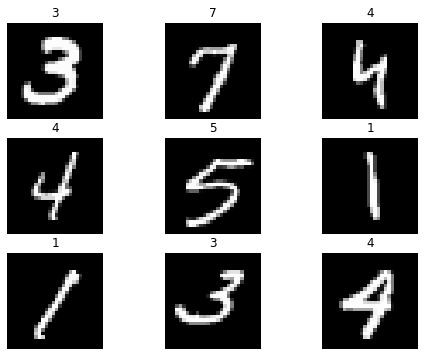

In [ ]:
samples = np.random.randint(60000, size=9)
print(samples)

plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(y_train[idx])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size = 0.2,
                                                    stratify = y_train)
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

## 정규화

In [ ]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# 원핫인코딩
y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)

In [ ]:
y_train_o.shape

(48000, 10)

## 모델

In [ ]:
X_train.shape

(48000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [ ]:
def build_model_3():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),

      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )
  return model

In [ ]:
model = build_model_3()
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_59 (Dense)            (None, 256)             

In [ ]:
y_val_o

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_o),
                verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0811 - acc: 0.9757 - val_loss: 0.0510 - val_acc: 0.9855
Epoch 2/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0409 - acc: 0.9871 - val_loss: 0.0392 - val_acc: 0.9881
Epoch 3/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0268 - acc: 0.9909 - val_loss: 0.0441 - val_acc: 0.9863
Epoch 4/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0370 - val_acc: 0.9901
Epoch 5/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0140 - acc: 0.9956 - val_loss: 0.0410 - val_acc: 0.9893
Epoch 6/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0112 - acc: 0.9962 - val_loss: 0.0428 - val_acc: 0.9905
Epoch 7/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0098 - acc: 0.9968 - val_loss: 0.0509 - val_acc: 0.9886
Epoch 8/10
1500/1500 [==========================

In [ ]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 4s 12ms/step - loss: 0.0341 - acc: 0.9915


[0.034134045243263245, 0.9915000200271606]

# 원핫하지않고

In [ ]:
def build_model_4():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),

      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      # sparse_categorical_crossentropy 할 경우 내부적으로 자신이 원핫을 함
      metrics = ['acc']
  )
  return model

In [ ]:
model = build_model_4()

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val),
                verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 57s 37ms/step - loss: 0.1392 - acc: 0.9574 - val_loss: 0.0611 - val_acc: 0.9814
Epoch 2/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0432 - acc: 0.9864 - val_loss: 0.0460 - val_acc: 0.9867
Epoch 3/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.0444 - val_acc: 0.9862
Epoch 4/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0198 - acc: 0.9935 - val_loss: 0.0411 - val_acc: 0.9888
Epoch 5/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0427 - val_acc: 0.9888
Epoch 6/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0111 - acc: 0.9961 - val_loss: 0.0464 - val_acc: 0.9880
Epoch 7/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.0540 - val_acc: 0.9892
Epoch 8/10
1500/1500 [==========================

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

# 4) 이진분류 -> 다중분류 (원핫인코딩X)
- sparse_categorical_crossentropy

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.shape

(768, 9)

In [ ]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 2023)
X_train.shape, X_test.shape

((614, 8), (154, 8))

## 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

y_train_s = y_train.values
y_test_s = y_test.values

In [ ]:
y_train_s[:5]

array([0, 0, 0, 1, 0])

## 모델

In [ ]:
X_train_s

array([[-1.13520038,  0.96926586,  0.66245311, ...,  1.17780158,
        -0.5772135 , -0.51332813],
       [ 0.35925295,  0.81261993,  0.30349907, ..., -0.23797746,
        -0.08800308, -0.42784306],
       [-0.23852838,  0.02939025,  0.45733652, ..., -1.08012189,
        -0.62494135,  0.59797785],
       ...,
       [-0.83630971,  1.87781229,  0.45733652, ...,  0.9947267 ,
         2.36998102, -0.94075351],
       [-1.13520038, -0.53453512,  0.35477822, ..., -1.64155151,
         0.3534795 , -0.51332813],
       [ 2.15259694,  0.43666968, -3.54243711, ...,  2.49594068,
         0.34154754,  0.59797785]])

In [ ]:
def build_model_5():
  model = keras.Sequential([
      layers.Dense(32, activation='relu', input_shape=(8,)),
      layers.Dense(8, activation='relu'),
      layers.Dense(2, activation='softmax')
      # 다중분류에서 softmax
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      # 원핫인코딩X -> sparse
      metrics = ['acc']
  )
  return model

In [ ]:
model = build_model_5()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                288       
                                                                 
 dense_35 (Dense)            (None, 8)                 264       
                                                                 
 dense_36 (Dense)            (None, 2)                 18        
                                                                 
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 30
BATCH_SIZE = 32 

log = model.fit(X_train_s, y_train_s,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          validation_split = 0.2,
          verbose = 1)

Epoch 1/30
16/16 [==============================] - 1s 13ms/step - loss: 0.6327 - acc: 0.6334 - val_loss: 0.6089 - val_acc: 0.6179
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5866 - acc: 0.7128 - val_loss: 0.5770 - val_acc: 0.6829
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5552 - acc: 0.7576 - val_loss: 0.5495 - val_acc: 0.7236
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5306 - acc: 0.7637 - val_loss: 0.5304 - val_acc: 0.7480
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5116 - acc: 0.7699 - val_loss: 0.5163 - val_acc: 0.7561
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4965 - acc: 0.7658 - val_loss: 0.5044 - val_acc: 0.7642
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4830 - acc: 0.7719 - val_loss: 0.4933 - val_acc: 0.7561
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4721 - acc: 0.7

In [ ]:
y_pred = model.predict(X_test_s)
y_pred[:5]

5/5 [==============================] - 0s 2ms/step


array([[0.9948771 , 0.00512299],
       [0.28621796, 0.7137821 ],
       [0.83991283, 0.16008712],
       [0.22703688, 0.77296305],
       [0.4957481 , 0.50425184]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 0, 1, 1])

In [ ]:
model.evaluate(X_train_s, y_train_s)

20/20 [==============================] - 0s 2ms/step - loss: 0.4141 - acc: 0.8094


[0.4140520989894867, 0.8094462752342224]

In [ ]:
model.evaluate(X_test_s, y_test_s)

5/5 [==============================] - 0s 2ms/step - loss: 0.4826 - acc: 0.7727


[0.4825911521911621, 0.7727272510528564]

# 5) tf.data.DataSet

## iterator

In [ ]:
for i in range(2):
  #라고 지정했을때, 내부적으로 iterator 형태로 바뀌어 돌아가게 된다
  print("")

In [ ]:
data = [1,2,3,4,5]
my_iter = iter(data)

k = my_iter.__next__()
print(k)

k = my_iter.__next__()
print(k)

k = my_iter.__next__()
print(k)

1
2
3


## 데이터 준비

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size = 0.2,
                                                    stratify = y_train)
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

In [ ]:
# 정규화
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
X_train = X_train.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [ ]:
X_train.shape, X_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

type(train_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
## train_ds = train_ds.cache().prepetch().shuffle(buffer_size = 50000).batch(batch_size=32)
# 모델에 이대로 넣으면 셔플 사이즈, 배치 사이즈가 자동으로 지정한대로 들어감 (최댓값)
# 캐싱도 가능
# prepetch : 앞의 학습동안 미리 다음 메모리를 올려두는것

train_ds = train_ds.shuffle(buffer_size = 5000).batch(batch_size=32)

In [ ]:
my_iter = iter(train_ds)
x, y = my_iter.next()

len(x), len(y)

(32, 32)

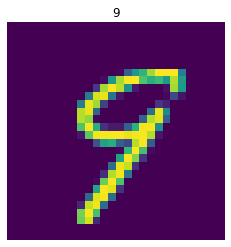

In [ ]:
plt.imshow(x[0].numpy().reshape(28,28))
plt.title(y[0].numpy())
plt.axis('off')
plt.show()

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = train_ds.batch(batch_size=32)

## 모델, 학습

In [ ]:
model = build_model_4()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
EPOCHS = 3
BATCH_SIZE = 32

log = model.fit(train_ds,
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose = 1)

Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0466 - val_acc: 0.9883
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099 - acc: 0.9966 - val_loss: 0.0420 - val_acc: 0.9892


In [ ]:
model.evaluate(train_ds)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.0102 - acc: 0.9966


[0.010230067186057568, 0.9966041445732117]

# 6) 함수형 API 사용하여 모델

In [ ]:
def build_model_6():
  inputs = layers.Input(shape=(28,28,1))
  x = layers.Conv2D(32, 3, activation='relu')(inputs)
  x = layers.MaxPool2D(2)(x)
  x = layers.Conv2D(64, 3, activation='relu')(x)
  x = layers.MaxPool2D(2)(x)

  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      # sparse_categorical_crossentropy 할 경우 내부적으로 자신이 원핫을 함
      metrics = ['acc']
  )
  return model

In [ ]:
model = build_model_6()
model.summary()

In [ ]:
EPOCHS = 3
BATCH_SIZE = 32

log = model.fit(train_ds,
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose = 1)

Epoch 1/3
1492/1500 [============================>.] - ETA: 0s - loss: 0.1368 - acc: 0.9580

ValueError: ignored

## 서브클래싱 모델

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = layers.Conv2D(32, 3, activation='relu')
    self.pool = layers.MaxPool2D(2)
    self.conv2 = layers.Conv2D(64, 3, activation='relu')
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(256, activation='relu')
    self.dense2 = layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.flatten(x)
    x = self.dense1(x)
    output = self.dense2(x)
    return output

In [ ]:
model = MyModel()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
EPOCHS = 3
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS,
                validation_data = (X_val, y_val),
                verbose = 1)

Epoch 1/3
1500/1500 [==============================] - 55s 36ms/step - loss: 0.1361 - acc: 0.9576 - val_loss: 0.0544 - val_acc: 0.9833
Epoch 2/3
1500/1500 [==============================] - 56s 38ms/step - loss: 0.0438 - acc: 0.9865 - val_loss: 0.0435 - val_acc: 0.9874
Epoch 3/3
1500/1500 [==============================] - 65s 44ms/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0512 - val_acc: 0.9827


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[4.39480175e-07, 5.35577556e-07, 5.27267184e-05, 1.26154133e-04,
        1.44168455e-08, 1.61676041e-07, 4.15467133e-10, 9.99803782e-01,
        3.40438334e-07, 1.58715684e-05],
       [2.05892457e-06, 1.57026516e-05, 9.99951065e-01, 1.29635418e-05,
        1.16130252e-08, 2.43452880e-09, 4.80176311e-07, 2.09462119e-08,
        1.76895974e-05, 4.57682017e-11],
       [1.47101182e-05, 9.99541461e-01, 1.98792477e-05, 3.82322696e-06,
        2.41063550e-04, 2.33479500e-06, 7.90182166e-05, 6.76544078e-05,
        2.38351768e-05, 6.02866066e-06],
       [9.99052703e-01, 6.92128424e-07, 1.13372844e-05, 4.70888381e-06,
        4.48278797e-06, 1.95739267e-05, 6.61633909e-04, 2.28870660e-04,
        4.62189428e-06, 1.13932456e-05],
       [1.25675214e-07, 2.95055656e-07, 4.48409907e-07, 1.06647150e-07,
        9.99906003e-01, 1.18299797e-08, 5.90708396e-07, 3.55718225e-06,
        4.12345514e-07, 8.84056426e-05]], dtype=float32)